Compare to Astro stars (with new data)

In [93]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

# AS stars

In [94]:
df_bin_MS=pd.read_pickle('minchisq.pkl')

ASstars=pd.read_table('/Users/lucy/Desktop/KeplerAges/ASage.webarchive',delimiter=',',skiprows=2)
ASstars=ASstars.dropna(subset=['KIC'])
ASstars

Clusters_cm=pd.merge(ASstars,df_bin_MS,left_on='KIC',right_on='KID',how='inner')
Clusters_cm


Pipe       KIC_x    Mass     Rad  log(g)     Age     Lum       rho  \
0       AST      3735871.0  1.1112  1.1014  4.3995  1.8414  1.5230  1.171100   
1       BASTA    3735871.0  1.0890  1.0957  4.3956  2.3457  1.5040  1.169009   
2       C2kSMO   3735871.0  1.0757  1.0858  4.3979  1.4544  1.4300  1.183600   
3       GOE      3735871.0  1.1057  1.0978  4.4004  1.6456  1.5186  1.177094   
4   V&amp;A      3735871.0  1.1050  1.0990  4.3992  1.7710  1.4540  1.172499   
5       YMCM     3735871.0  1.1316  1.1084  4.4017  1.9465  0.1854  1.169900   
6       AST      8179536.0  1.1977  1.3396  4.2619  2.7851  2.6220  0.701500   
7       BASTA    8179536.0  1.1593  1.3266  4.2548  3.5434  2.5710  0.697301   
8       C2kSMO   8179536.0  1.2597  1.3520  4.2760  1.7632  2.5720  0.718000   
9       GOE      8179536.0  1.2280  1.3471  4.2682  1.6766  2.6600  0.707618   
10  V&amp;A      8179536.0  1.2580  1.3520  4.2742  1.7090  2.6400  0.717868   
11      YMCM     8179536.0  1.2346  1.3542  4.2656  2.6906  0.4276  0.699830   
12      AST      9139151.0  1.1483  1.1499  4.3763  2.4324  1.8510  1.063400   
13      BASTA    9139151.0  1.1783  1.1526  4.3824  1.3236  1.8550  1.075444   
14      C2kSMO   9139151.0  1.2167  1.1695  4.3869  1.3428  1.8570  1.071600   
15      GOE      9139151.0  1.1434  1.1451  4.3784  1.9517  1.8441  1.072619   
16  V&amp;A      9139151.0  1.1080  1.1340  4.3732  1.7640  1.8000  1.070850   
17      YMCM     9139151.0  1.1926  1.1650  4.3813  2.3401  0.2791  1.061800   
18      AST     10644253.0  1.1371  1.1100  4.4027  1.1767  1.4850  1.170800   
19      BASTA   10644253.0  1.0985  1.0987  4.3956  2.3936  1.4530  1.164403   
20      C2kSMO  10644253.0  1.1726  1.1209  4.4078  0.9427  1.4810  1.172900   
21      GOE     10644253.0  1.1340  1.1089  4.4027  1.1384  1.4315  1.171447   
22  V&amp;A     10644253.0  1.1180  1.1050  4.4008  1.0080  1.4710  1.171950   
23      YMCM    10644253.0  1.1748  1.1221  4.4074  1.0644  0.1791  1.170600   
24      AST     11081729.0  1.3153  1.4359  4.2423  1.9282  3.3950  0.625600   
25      BASTA   11081729.0  1.2980  1.4226  4.2449  1.8825  3.2770  0.635920   
26      C2kSMO  11081729.0  1.3227  1.4172  4.2563  0.8216  3.3680  0.654600   
27      GOE     11081729.0  1.4985  1.4852  4.2700  0.8329  3.8699  0.644329   
28  V&amp;A     11081729.0  1.2560  1.4150  4.2345  2.1670  3.0990  0.622740   
29      YMCM    11081729.0  1.3383  1.4428  4.2455  1.8389  0.5358  0.627190   

      Dist    Xini  ...        v_b       w     abs_G     source_id  \
0   124.05  0.7070  ...   3.505467  0.2030  4.205251  2.099574e+18   
1   123.40  0.7080  ...   3.505467  0.2030  4.205251  2.099574e+18   
2   122.29  0.6920  ...   3.505467  0.2030  4.205251  2.099574e+18   
3   123.64  0.7105  ...   3.505467  0.2030  4.205251  2.099574e+18   
4   123.77  0.7090  ...   3.505467  0.2030  4.205251  2.099574e+18   
5   124.84  0.7210  ...   3.505467  0.2030  4.205251  2.099574e+18   
6   139.50  0.7080  ...  -0.696889  0.2429  3.614237  2.079577e+18   
7   138.14  0.7170  ...  -0.696889  0.2429  3.614237  2.079577e+18   
8   140.81  0.7200  ...  -0.696889  0.2429  3.614237  2.079577e+18   
9   140.29  0.6569  ...  -0.696889  0.2429  3.614237  2.079577e+18   
10  140.81  0.7150  ...  -0.696889  0.2429  3.614237  2.079577e+18   
11  141.03  0.7195  ...  -0.696889  0.2429  3.614237  2.079577e+18   
12  101.18  0.7020  ...  -0.036908  0.2276  4.081215  2.106822e+18   
13  101.43  0.7080  ...  -0.036908  0.2276  4.081215  2.106822e+18   
14  102.91  0.7100  ...  -0.036908  0.2276  4.081215  2.106822e+18   
15  100.76  0.7116  ...  -0.036908  0.2276  4.081215  2.106822e+18   
16   99.78  0.6650  ...  -0.036908  0.2276  4.081215  2.106822e+18   
17  102.51  0.7180  ...  -0.036908  0.2276  4.081215  2.106822e+18   
18   93.85  0.6980  ...  10.003074  0.2272  4.188347  2.119828e+18   
19   92.89  0.6980  ...  10.003074  0.2272  4.188347  2.119828e+18   
20   94.77  0.7140  ...  10.003074  0.2272  4.188347  2.119

Text(0, 0.5, 'Rotation Period [days]')

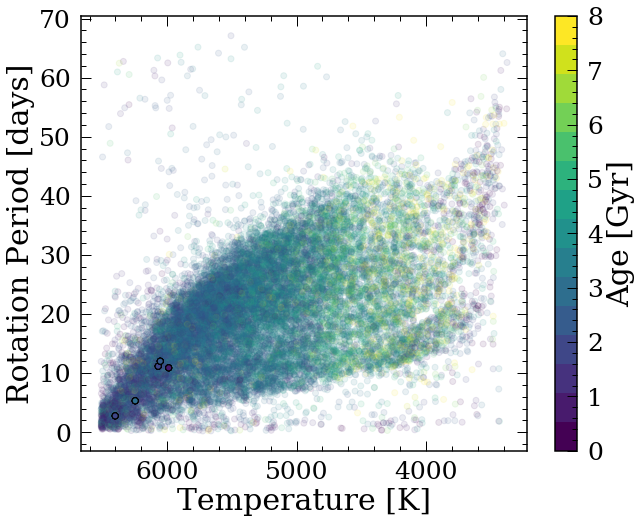

In [95]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['Prot'],
            c=df_bin_MS['kin_age'],cmap=cm,vmin=0,vmax=8,alpha=0.1)
plt.scatter(Clusters_cm['teff_calc'],Clusters_cm['Prot'],
            c=Clusters_cm['Age'],cmap=cm,vmin=0,vmax=8,edgecolor='k')
cb=plt.colorbar()

cb.set_label('Age [Gyr]')
plt.gca().invert_xaxis()
plt.xlabel('Temperature [K]')
plt.ylabel('Rotation Period [days]')


3.3162509432376237


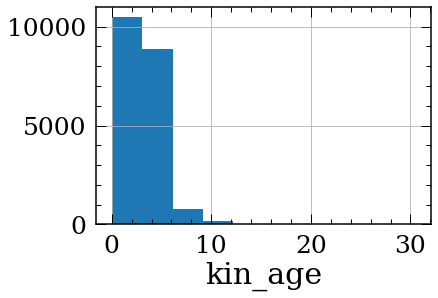

In [96]:
df_bin_MS['kin_age'].hist()
plt.xlabel('kin_age')
print(np.mean(df_bin_MS['kin_age']))

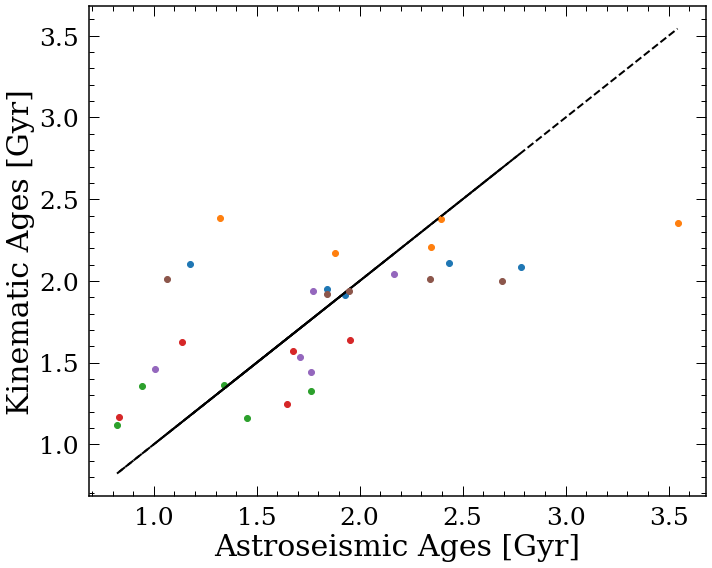

In [97]:

plt.figure(figsize=(10,8))
pcount=1
for pip in Clusters_cm['Pipe'].unique():
    plotCM=Clusters_cm.loc[Clusters_cm['Pipe']==pip]
    plt.plot([min(plotCM["Age"]),max(plotCM["Age"])],
             [min(plotCM["Age"]),max(plotCM["Age"])],'k--')
    
    z=np.polyfit(plotCM["kin_age"],plotCM["Age"],1)

    plt.plot(plotCM["Age"],np.polyval(z,plotCM["kin_age"]),'o',label=pip)
    
    plt.xlabel('Astroseismic Ages [Gyr]')
    plt.ylabel('Kinematic Ages [Gyr]')
    r = np.corrcoef(plotCM["Age"], plotCM["kin_age"])

    pcount=pcount+1
plt.tight_layout()
#plt.legend()

#plt.savefig('checkage.png')

# Clusters

In [98]:
Clusters=pd.read_table('OpenClusters/JasonCluster2020April08.csv',delimiter=',')
#Clusters['AGE']=NGC6811['AGE']
Clusters.columns


Index(['CLUSTER', 'DR2NAME', 'DR2_NUM', 'ID', 'ID_SOURCE', 'RA', 'DEC',
       'BP_RP', 'GMAG', 'AGE', 'AV', 'PLX', 'DISTANCE', 'DM', 'BP_RP_0', 'M_G',
       'BINARY_SHORT', 'BINARY_WIDE', 'PROT', 'E_PROT', 'PROT_REF', 'TEFF',
       'MASS', 'BENCH'],
      dtype='object')

In [99]:
dfProt_cluster=pd.merge(df_bin_MS[['teff_calc','Rvar','designation','kin_age','KID']],Clusters,left_on='designation',right_on='DR2NAME',how='inner')
print(len(dfProt_cluster))
clusternames=dfProt_cluster.CLUSTER.unique()
clusternames


66


array(['NGC_6811'], dtype=object)

In [100]:
def findstars(df,f1_star,f2_star,f1='teff_calc',f2='Prot'):
    KIDs=np.zeros(len(f1_star))
    count=0
    for i in range(len(f1_star)):
        update_progress(i/len(f1_star))
        teff,prot=f1_star[i],f2_star[i]
        df['dist']=np.power(df[f1]-teff,2.)+np.power(df[f2]-prot,2.)
        KIDs[count]=df.sort_values(by=['dist'])['KID'].iloc[0]
        count=count+1
    return KIDs



In [67]:
KIDs=findstars(df_bin_MS,Clusters['TEFF'],Clusters['PROT'])


Progress: [####################] 99.9%


Pleiades 0.12
Praesepe 0.67
Hyades 0.73
NGC_6811 1.0
NGC_752 1.4
NGC_6819 2.5
Ruprecht_147 2.7


Text(0, 0.5, 'Prot [days]')

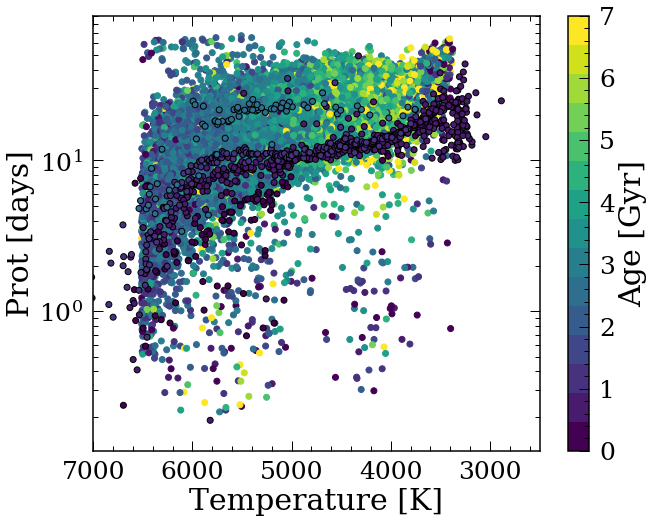

In [89]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['Prot'],
            c=df_bin_MS['kin_age'],cmap=cm,vmin=0,vmax=7)
for name in Clusters.CLUSTER.unique():
    dfProt_cluster_single=Clusters.loc[Clusters['CLUSTER']==name].reset_index(drop=True)
    
    mask1=dfProt_cluster_single['PROT']<10
    mask2=dfProt_cluster_single['TEFF']<5000
    
    mask=mask1&mask2
    
    
    dfProt_cluster_single=dfProt_cluster_single[~mask]
    
    
    print(name,dfProt_cluster_single['AGE'].iloc[0]/1000)
    plt.scatter(dfProt_cluster_single['TEFF'],dfProt_cluster_single['PROT'],
                c=dfProt_cluster_single['AGE']/1000,cmap=cm,vmin=0,vmax=7,edgecolor='k')
    
cb=plt.colorbar()
plt.xlim([2500,7000])
plt.yscale('log')
cb.set_label('Age [Gyr]')
plt.gca().invert_xaxis()
plt.xlabel('Temperature [K]')
plt.ylabel('Prot [days]')




(0, 5)

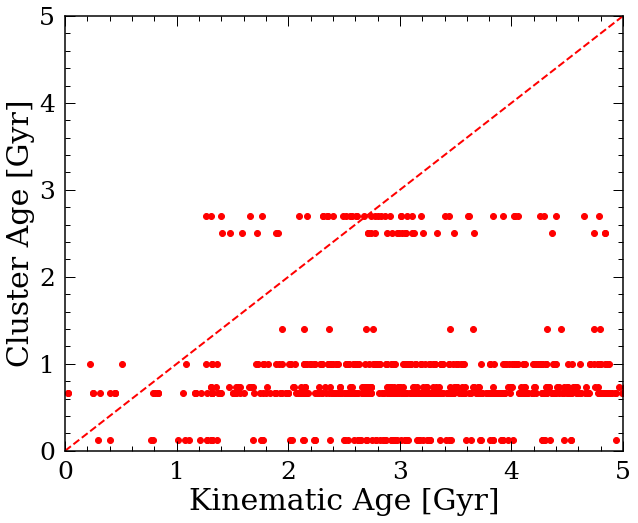

In [91]:
Clusters['KID']=KIDs
df_CLUSTERS=pd.merge(Clusters,df_bin_MS[['KID','kin_age']],left_on='KID',right_on='KID',how='inner')

mask1=df_CLUSTERS['PROT']<10
mask2=df_CLUSTERS['TEFF']<5000
    
mask=mask1&mask2
    
    
df_CLUSTERS=df_CLUSTERS[~mask]

plt.figure(figsize=(10,8))
plt.scatter(df_CLUSTERS['kin_age'],df_CLUSTERS['AGE']/1000,c='r',cmap=cm)
plt.plot([0,5],[0,5],'r--')

#plt.ylim([0,50000])
plt.xlabel('Kinematic Age [Gyr]')
plt.ylabel('Cluster Age [Gyr]')
plt.xlim([0,5])
plt.ylim([0,5])

(0, 5)

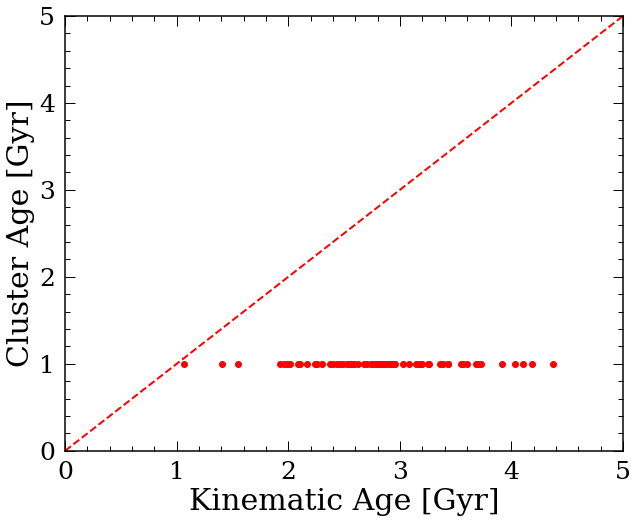

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(dfProt_cluster['kin_age'],dfProt_cluster['AGE']/1000,c='r',cmap=cm)
plt.plot([0,5],[0,5],'r--')

#plt.ylim([0,50000])
plt.xlabel('Kinematic Age [Gyr]')
plt.ylabel('Cluster Age [Gyr]')
plt.xlim([0,5])
plt.ylim([0,5])

# plot against AGOGEE abundances

In [101]:
APOGEE=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')


In [102]:
cols=[i for i in APOGEE.columns if '_FE' in i]
cols=[i for i in cols if '_FEH' not in i]
cols=[i for i in cols if '_ERR' not in i]
cols=[i for i in cols if '_FLAG' not in i]
cols

['C_FE',
 'CI_FE',
 'N_FE',
 'O_FE',
 'NA_FE',
 'MG_FE',
 'AL_FE',
 'SI_FE',
 'P_FE',
 'S_FE',
 'K_FE',
 'CA_FE',
 'TI_FE',
 'TIII_FE',
 'V_FE',
 'CR_FE',
 'MN_FE',
 'CO_FE',
 'NI_FE',
 'CU_FE',
 'GE_FE',
 'RB_FE',
 'CE_FE',
 'ND_FE',
 'YB_FE']

In [103]:
df_bin_MS=pd.merge(APOGEE,df_bin_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_bin_MS=df_bin_MS.loc[df_bin_MS['FE_H']>-5000]

abund=['C_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','SC_FE','TI_FE',
      'V_FE','CR_FE','MN_FE','CO_FE','NI_FE','CU_FE','ZN_FE','SR_FE','Y_FE','ZR_FE',
      'BA_FE','LA_FE','CE_FE','PR_FE','ND_FE','SM_FE','EU_FE','GD_FE','DY_FE']

In [104]:
#print(len(df_NN_MS),len(df_NN_giant),len(df_bin_MS),len(df_bin_giant))

-0.013571089133620262


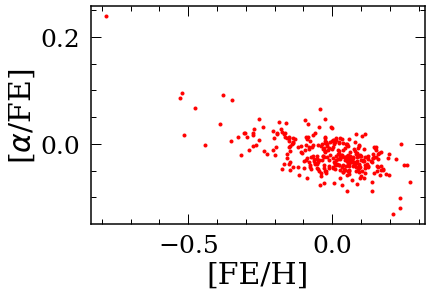

In [105]:
# alpha/Fe
plt.plot(figsize=(10,8))
plt.plot(df_bin_MS['FE_H'],df_bin_MS['ALPHA_M'],'r.')
plt.ylabel('[$\\alpha$/FE]')
plt.xlabel('[FE/H]')
print(np.mean(df_bin_MS['FE_H']))

319


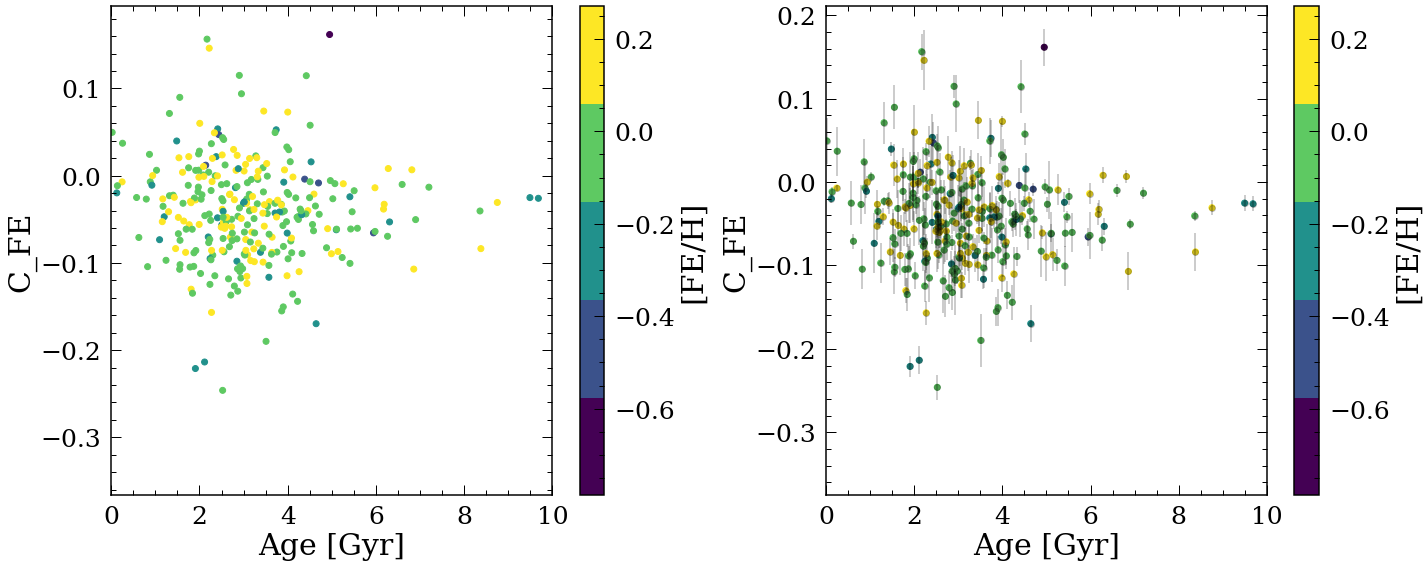

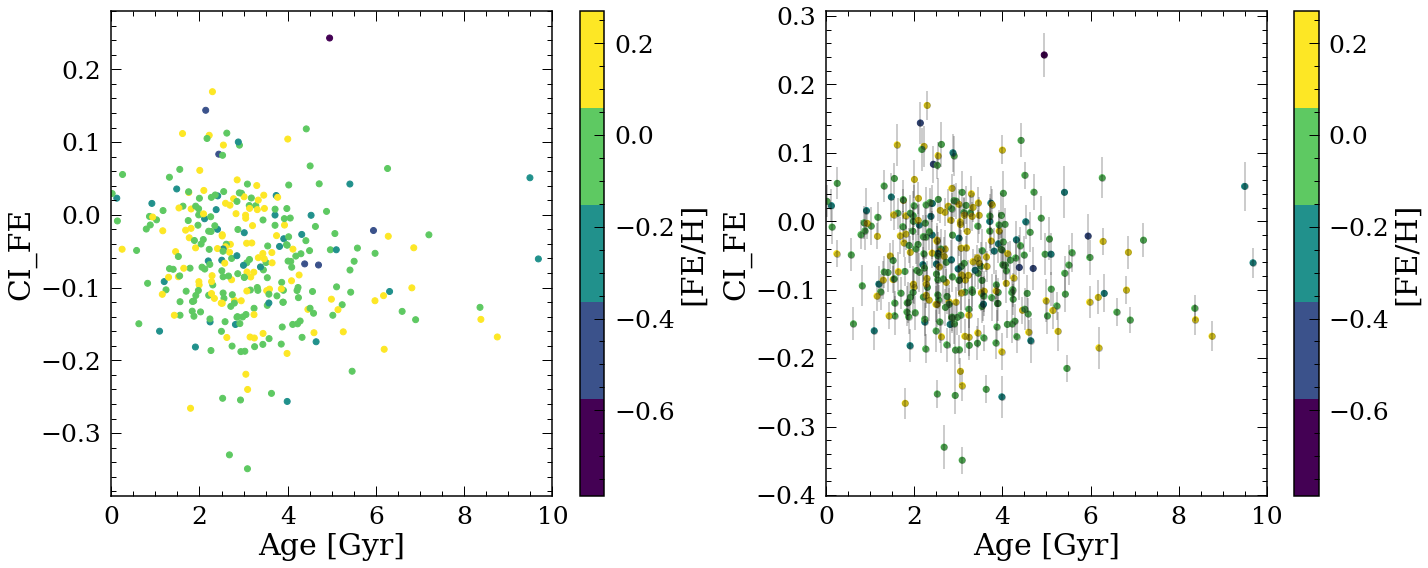

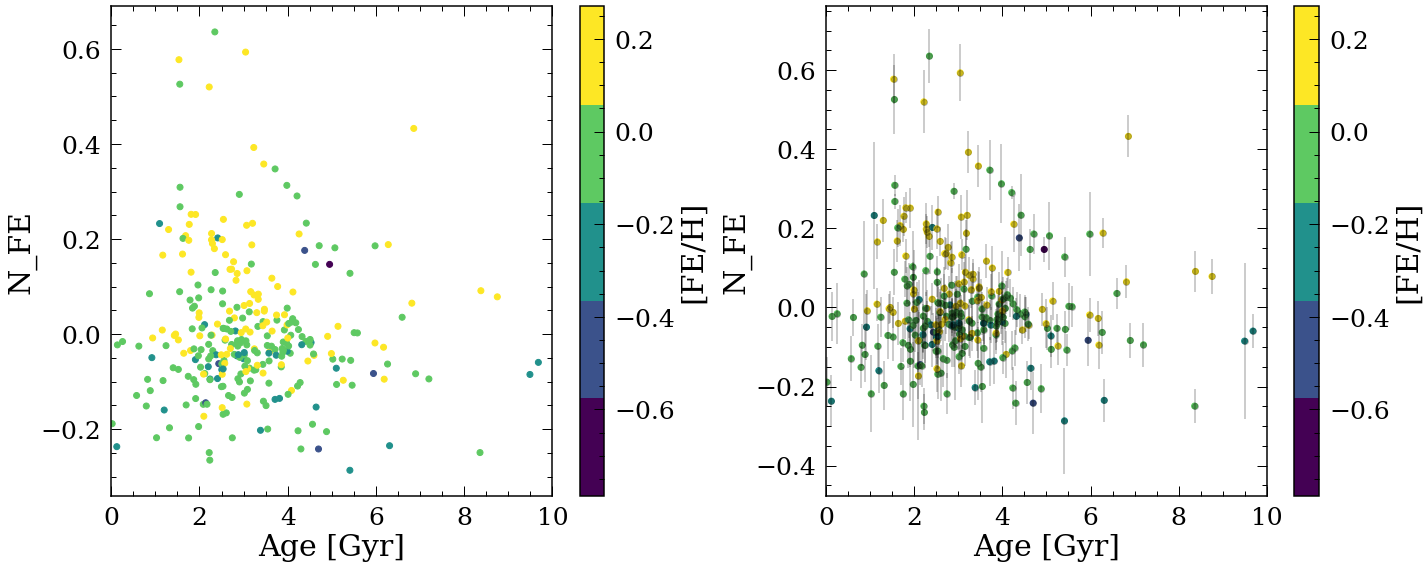

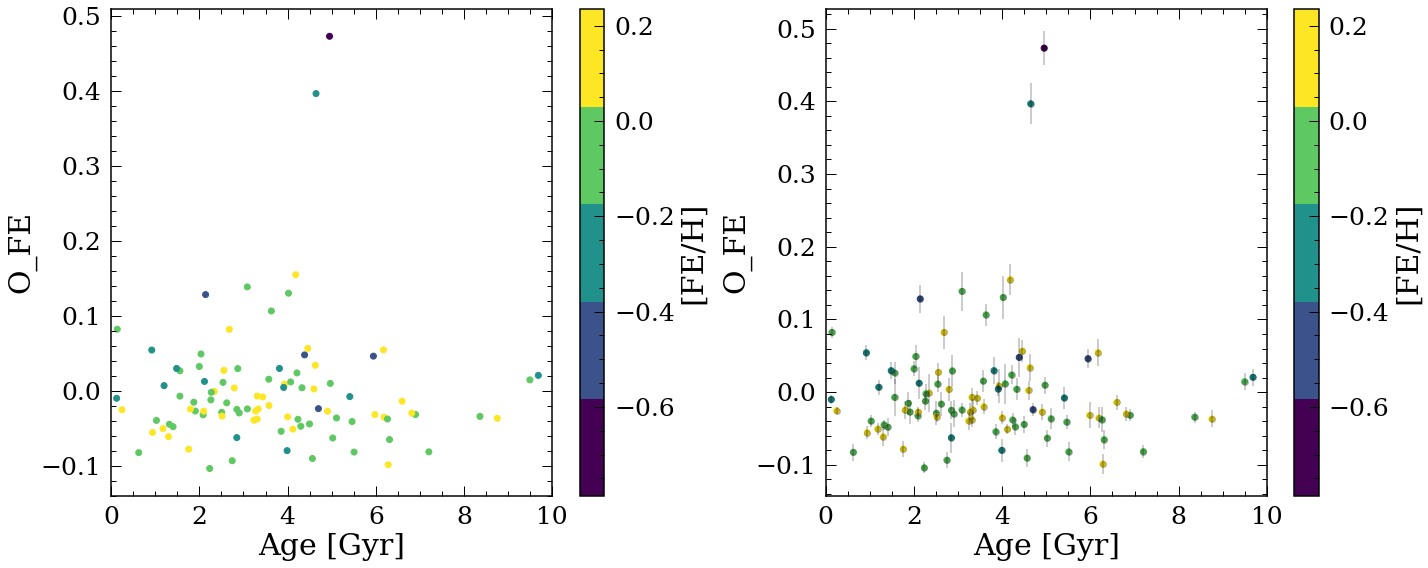

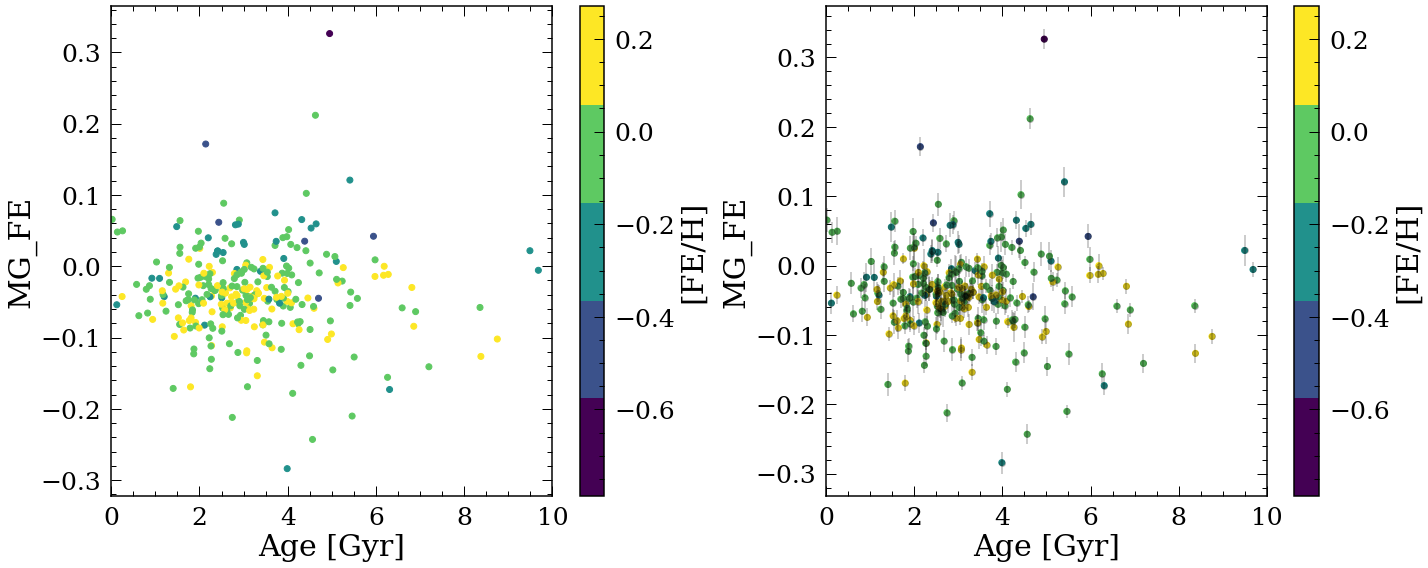

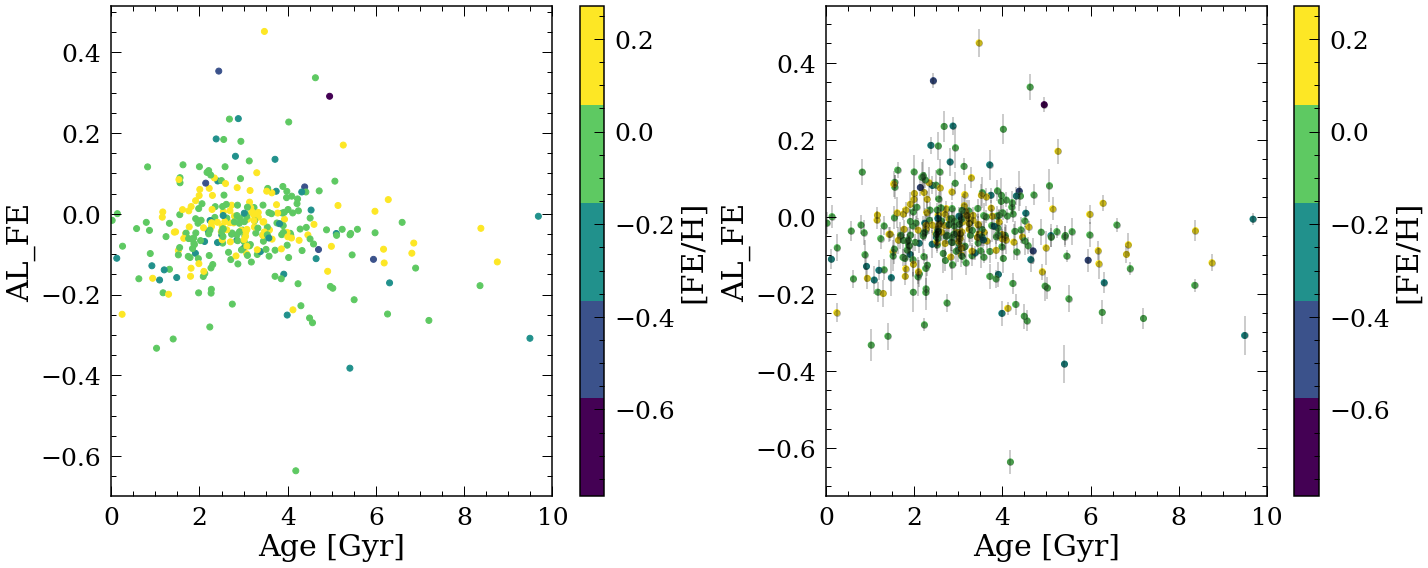

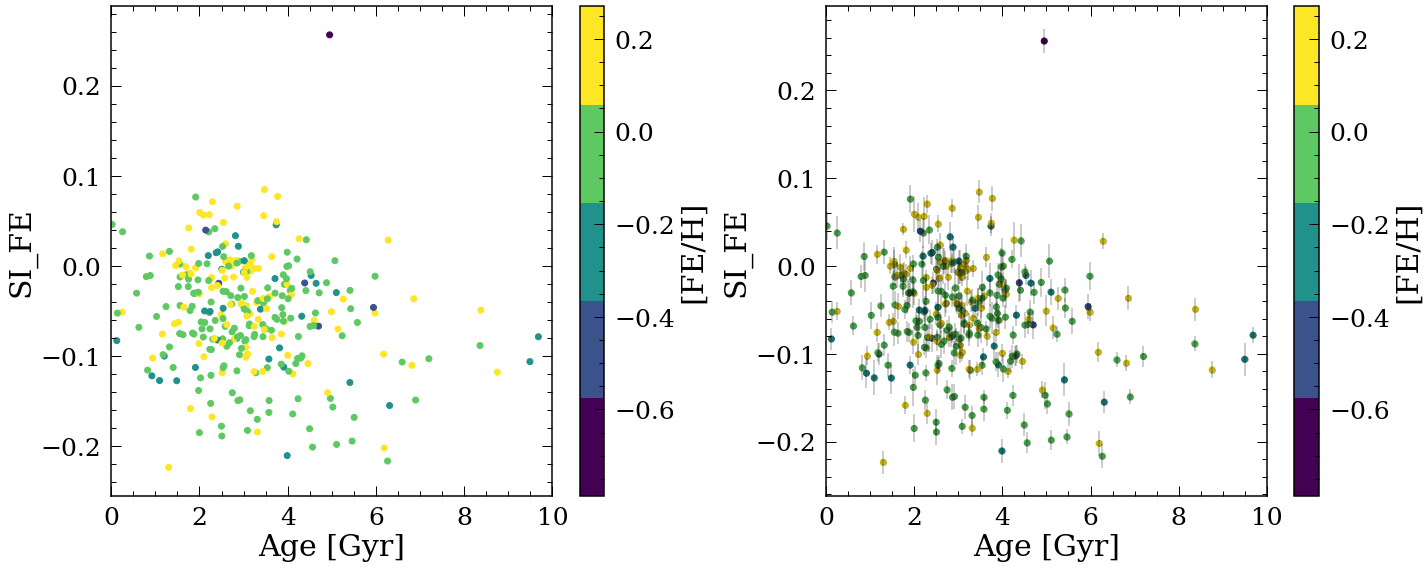

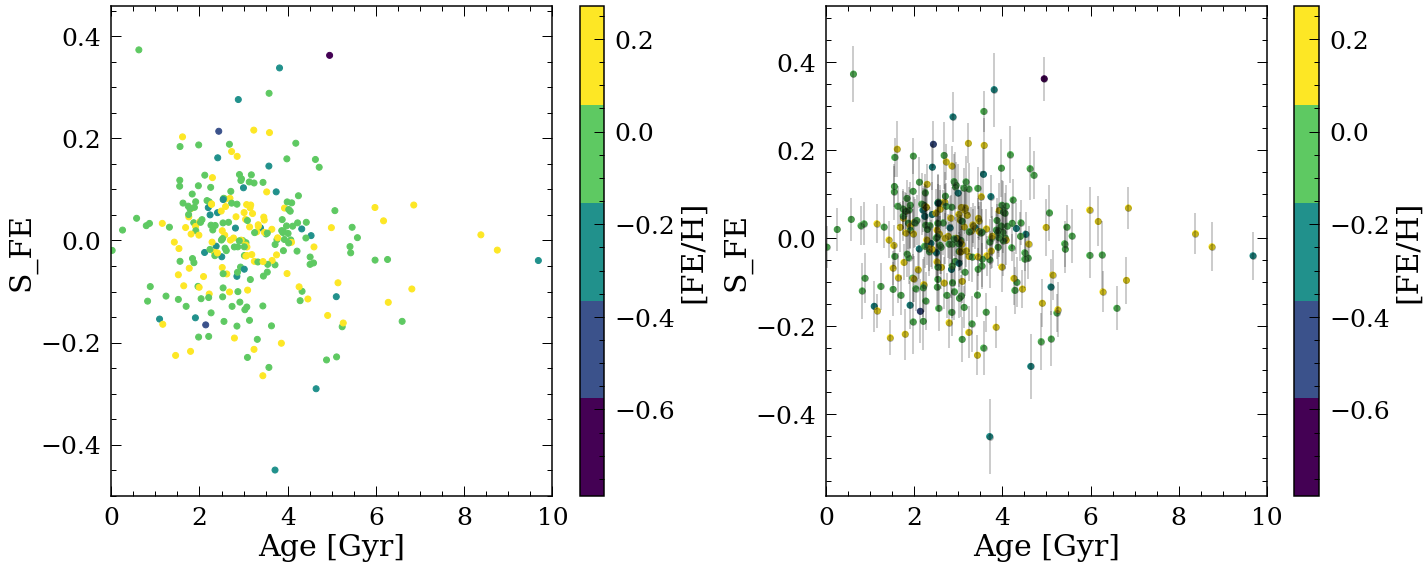

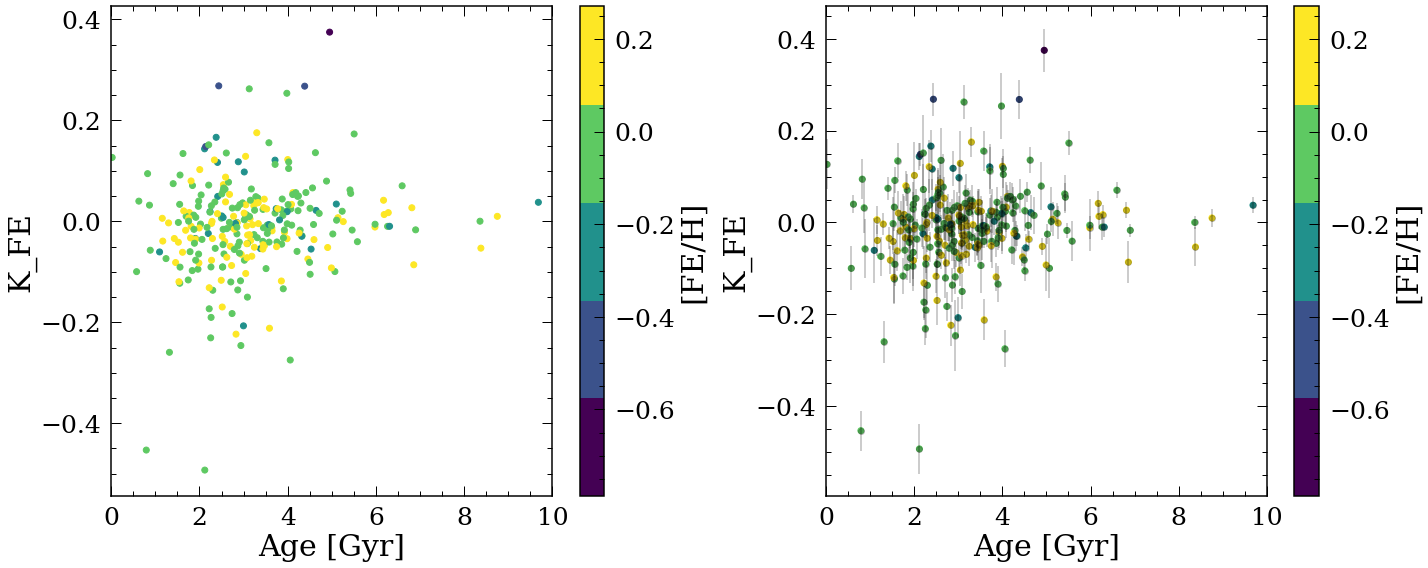

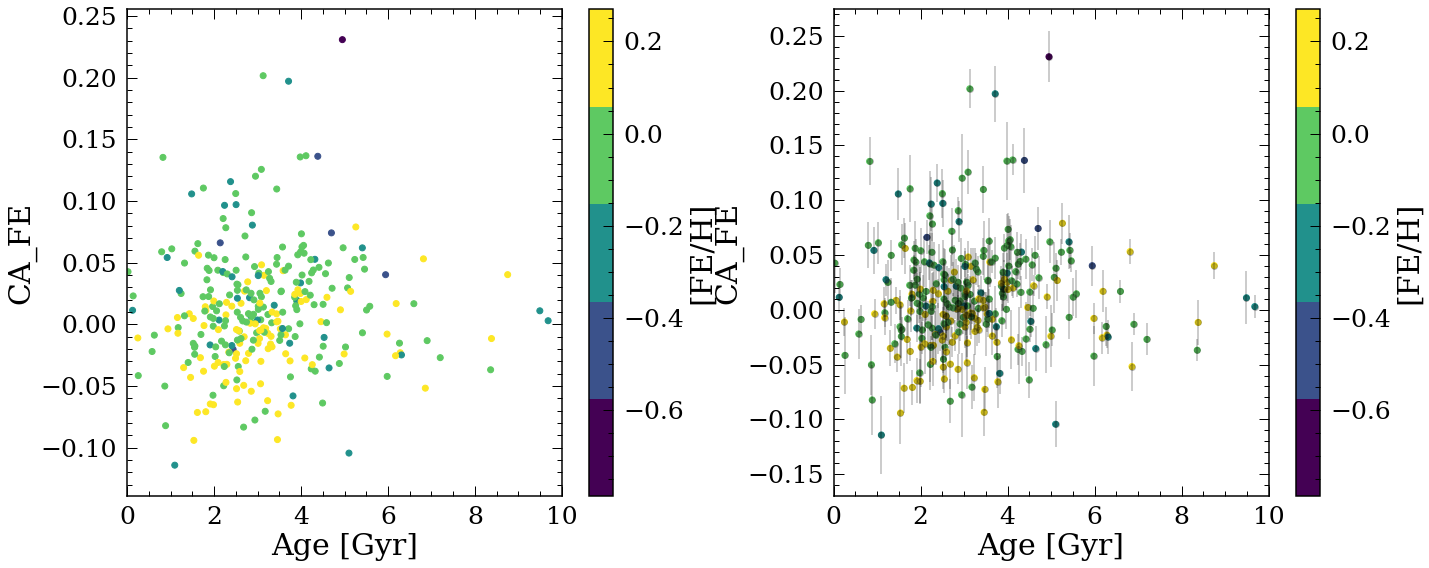

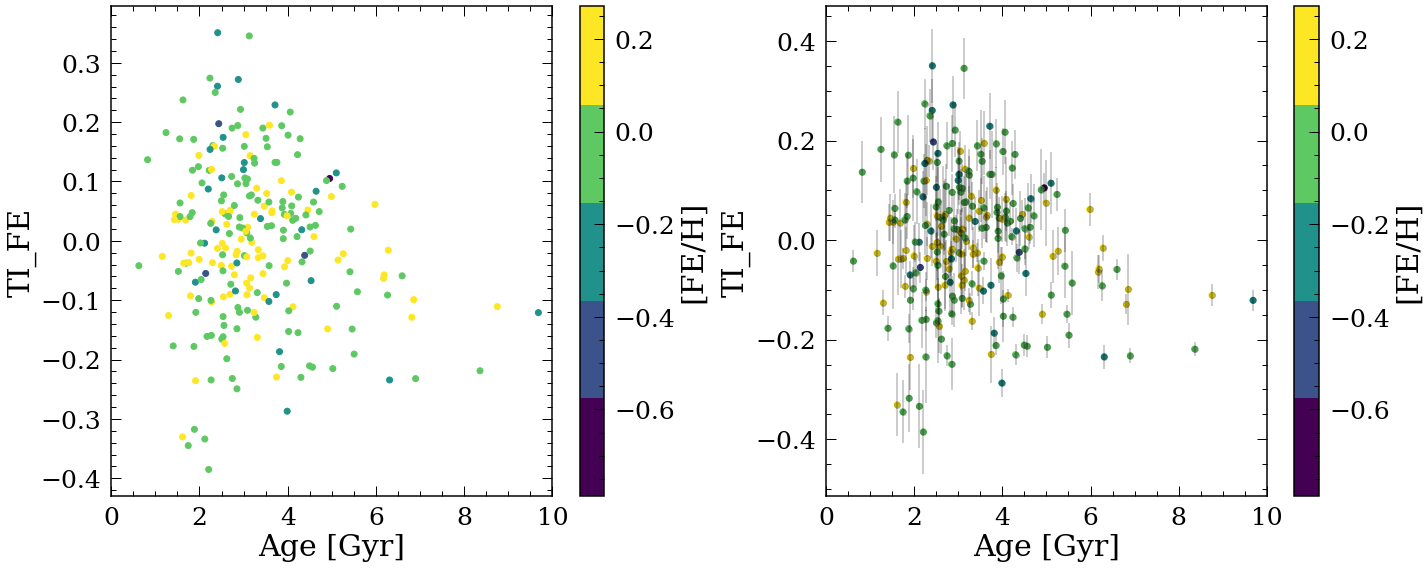

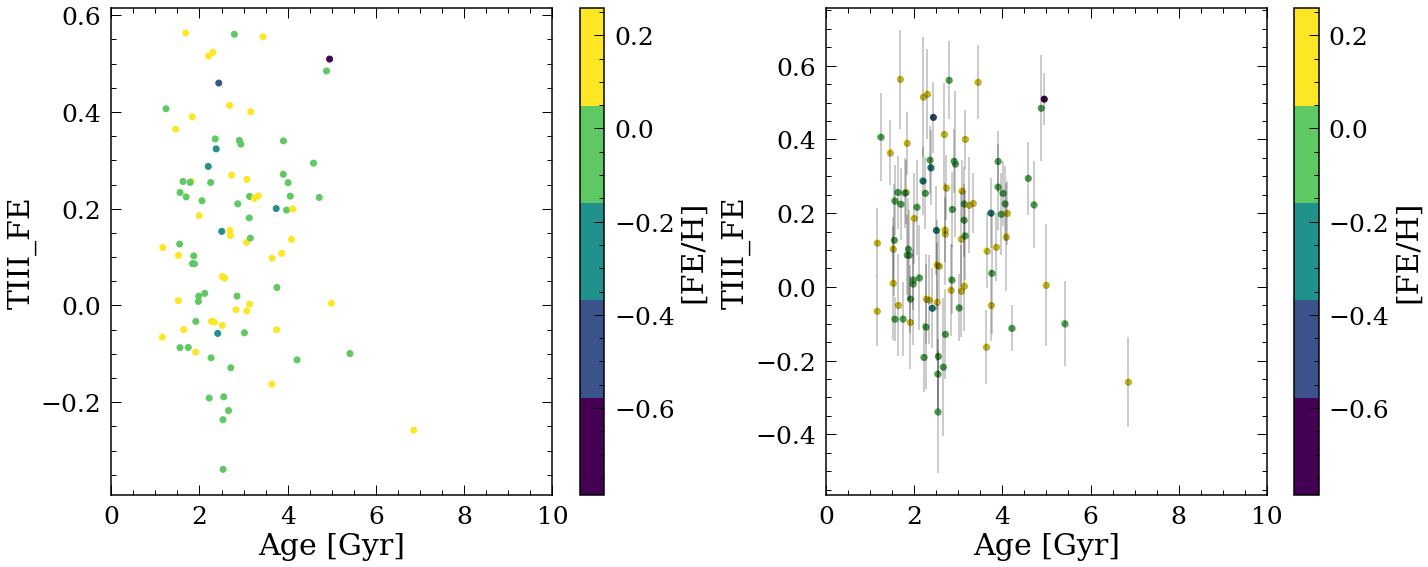

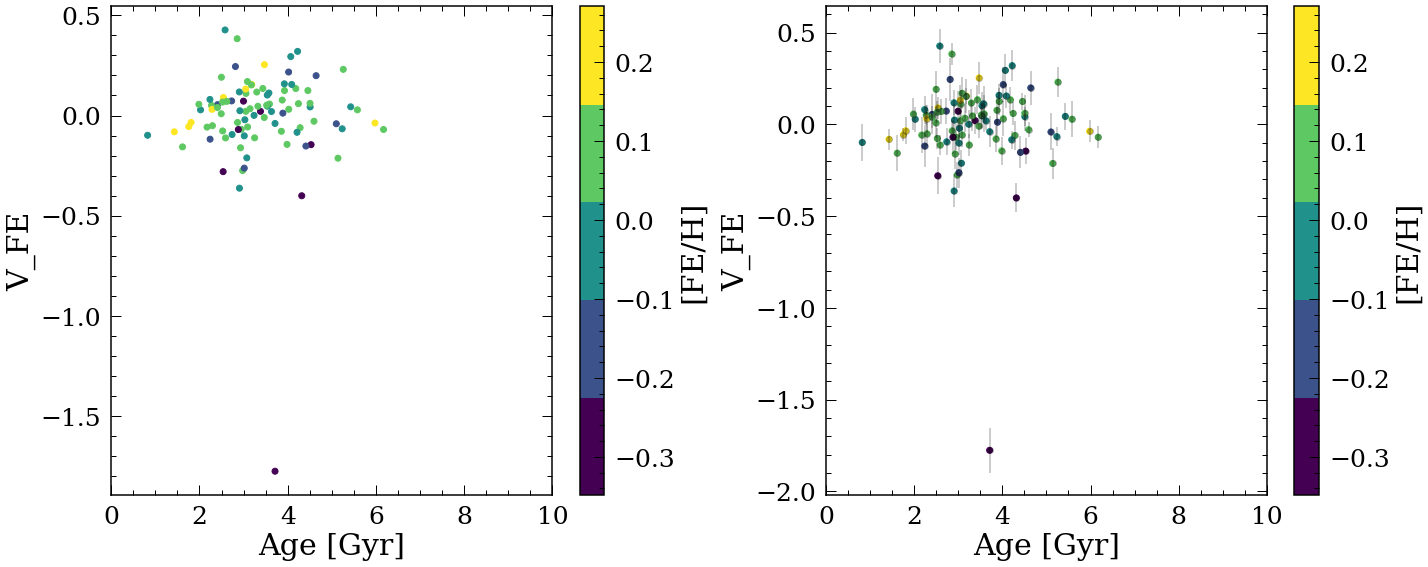

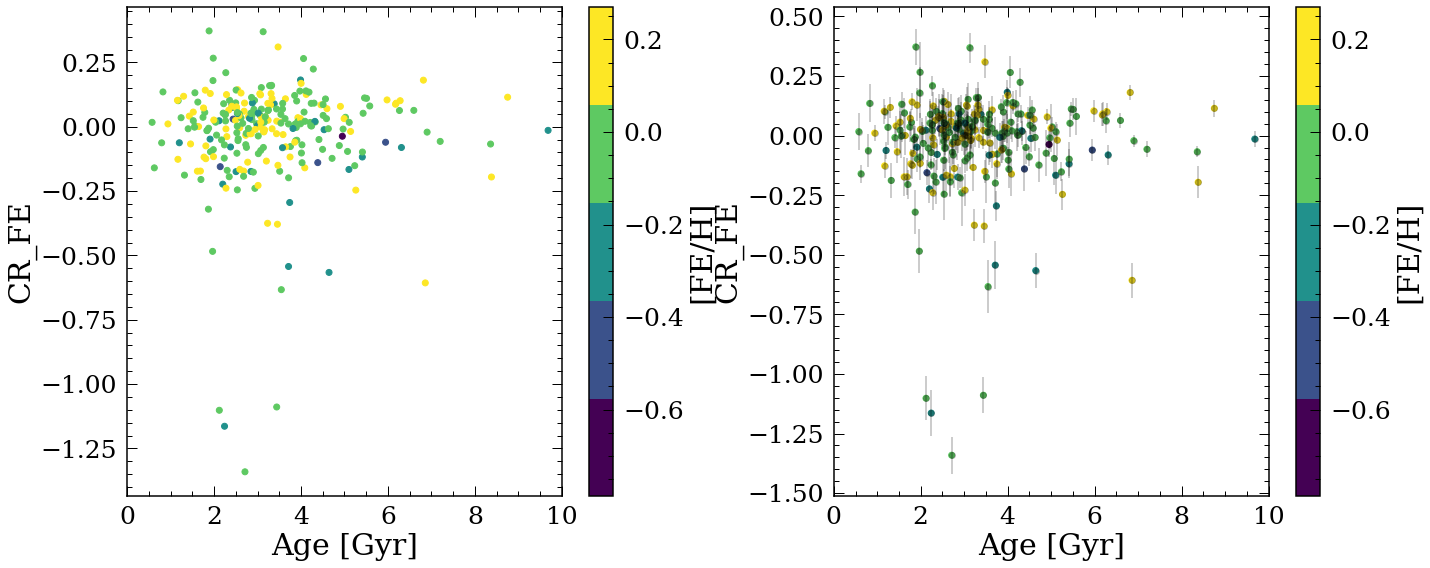

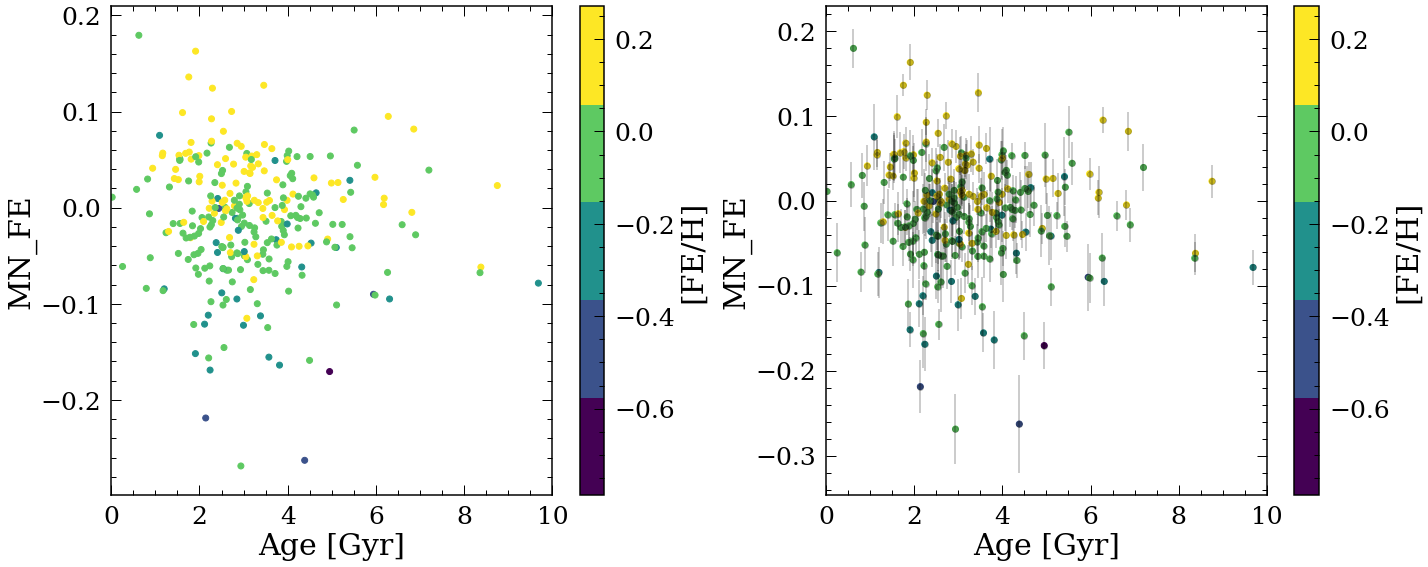

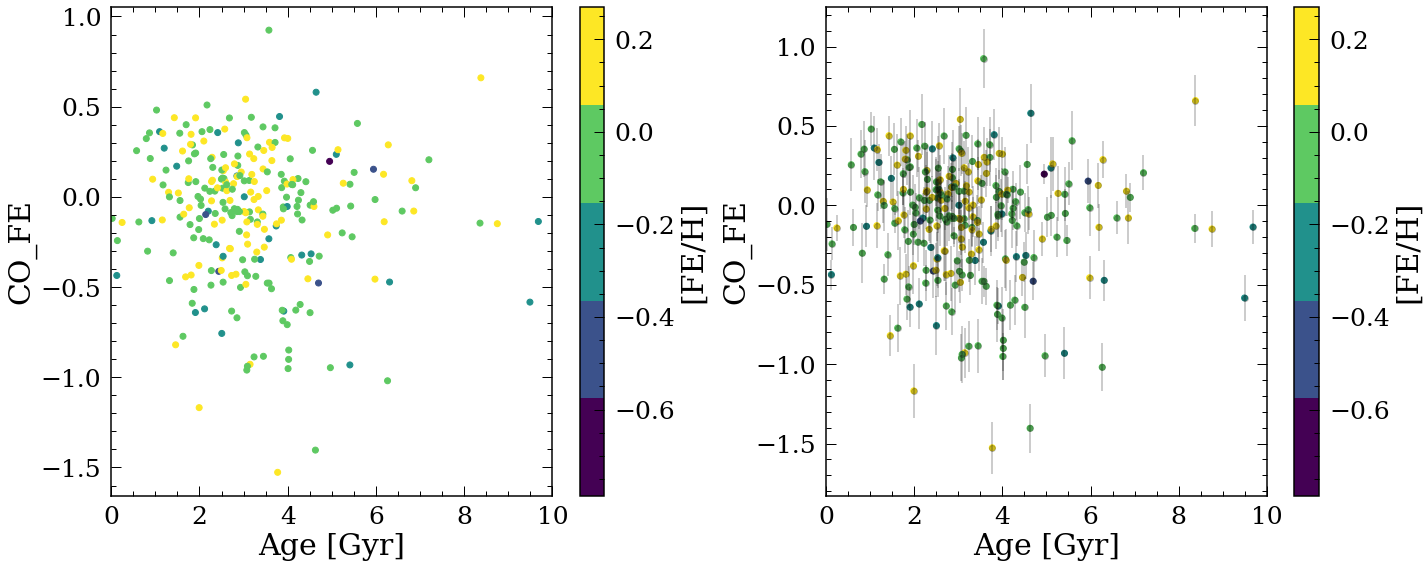

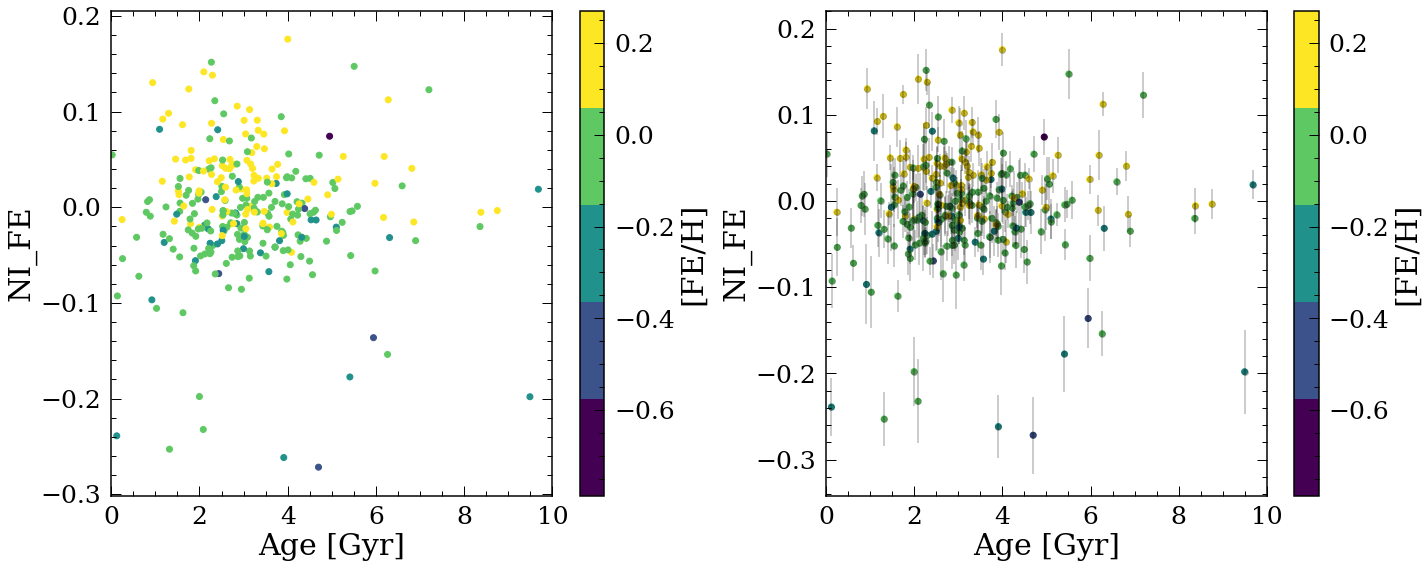

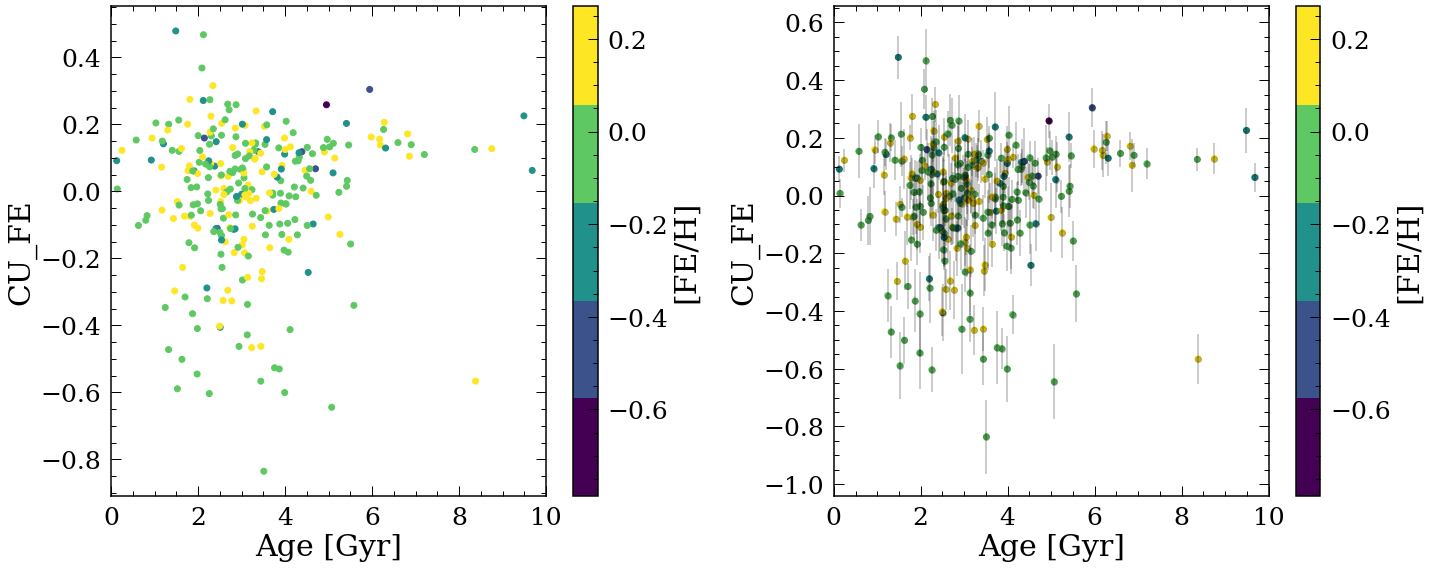

In [106]:
cm = plt.cm.get_cmap('viridis',5)
print(len(df_bin_MS))
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_bin_MS.loc[df_bin_MS[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['kin_age'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['kin_age'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['kin_age'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])

In [107]:
plt.figure(figsize=(30,30))
df_st=df_bin_MS.loc[abs(df_bin_MS['FE_H'])<=0.1]


<Figure size 2160x2160 with 0 Axes>

# Solar twins

In [108]:
df_st.to_pickle('Figures/solartwins.pkl')

In [48]:
df_st=pd.read_pickle('Figures/solartwins.pkl')
df_st=df_st.loc[abs(df_st['teff_calc']-5778)<=100]
df_st=df_st.loc[abs(df_st['LOGG']-4.43)<=0.1]
print(len(df_st))
df_ka=pd.read_table('BedellAbund.csv',delimiter=',')
df_ka.HIP=[int(i) for i in df_ka.HIP.values]
df_ka_age=pd.read_table('Bedell_age.csv',delimiter=',')
df_ka_age.HIP=[int(i) for i in df_ka_age.HIP.values]
df_fe=pd.read_table('Bedell_Fe.csv',delimiter=',')
df_fe.HIP=[int(i) for i in df_fe.HIP.values]

11


In [49]:
df_st_md=pd.merge(df_ka,df_ka_age,left_on='HIP',right_on='HIP',how='inner')
df_st_md=pd.merge(df_st_md,df_fe,left_on='HIP',right_on='HIP',how='inner')
df_st_md.columns

Index(['HIP', '[CI/H]', '[CH/H]', '[OI/H]', '[NaI/H]', '[MgI/H]', '[AlI/H]',
       '[SiI/H]', '[SI/H]', '[CaI/H]', '[ScI/H]', '[ScII/H]', '[TiI/H]',
       '[TiII/H]', '[VI/H]', '[CrI/H]', '[CrII/H]', '[MnI/H]', '[CoI/H]',
       '[NiI/H]', '[CuI/H]', '[ZnI/H]', '_RA', '_DE', 'recno', 'e_[ZnI/H]',
       'e_[VI/H]', 'e_[TiII/H]', 'e_[SiI/H]', 'e_[TiI/H]', 'e_[SI/H]',
       'e_[ScII/H]', 'e_[ScI/H]', 'e_[OI/H]', 'e_[NiI/H]', 'e_[NaI/H]',
       'e_[MnI/H]', 'e_[MgI/H]', 'e_[CuI/H]', 'e_[AlI/H]', 'e_[CaI/H]',
       'e_[CH/H]', 'e_[CI/H]', 'e_[CoI/H]', 'e_[CrI/H]', 'e_[CrII/H]',
       'RAJ2000_x', 'DEJ2000_x', 'Agemp', 'AgeLL1s', 'AgeUL1s', 'AgeLL2s',
       'AgeUL2s', 'Agemean', 'Agestd', 'Massmp', 'MassLL1s', 'MassUL1s',
       'MassLL2s', 'MassUL2s', 'MassMean', 'MassStd', 'RAJ2000_y', 'DEJ2000_y',
       'SNR', 'Teff', 'e_Teff', 'logg', 'e_logg', '[Fe/H]', 'e_[Fe/H]', 'Xi',
       'e_Xi'],
      dtype='object')

In [50]:
abun_apog=['C_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','TI_FE','CR_FE','MN_FE','CO_FE',
       'NI_FE','CU_FE']

abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/'}

Progress: [##################--] 91.7%


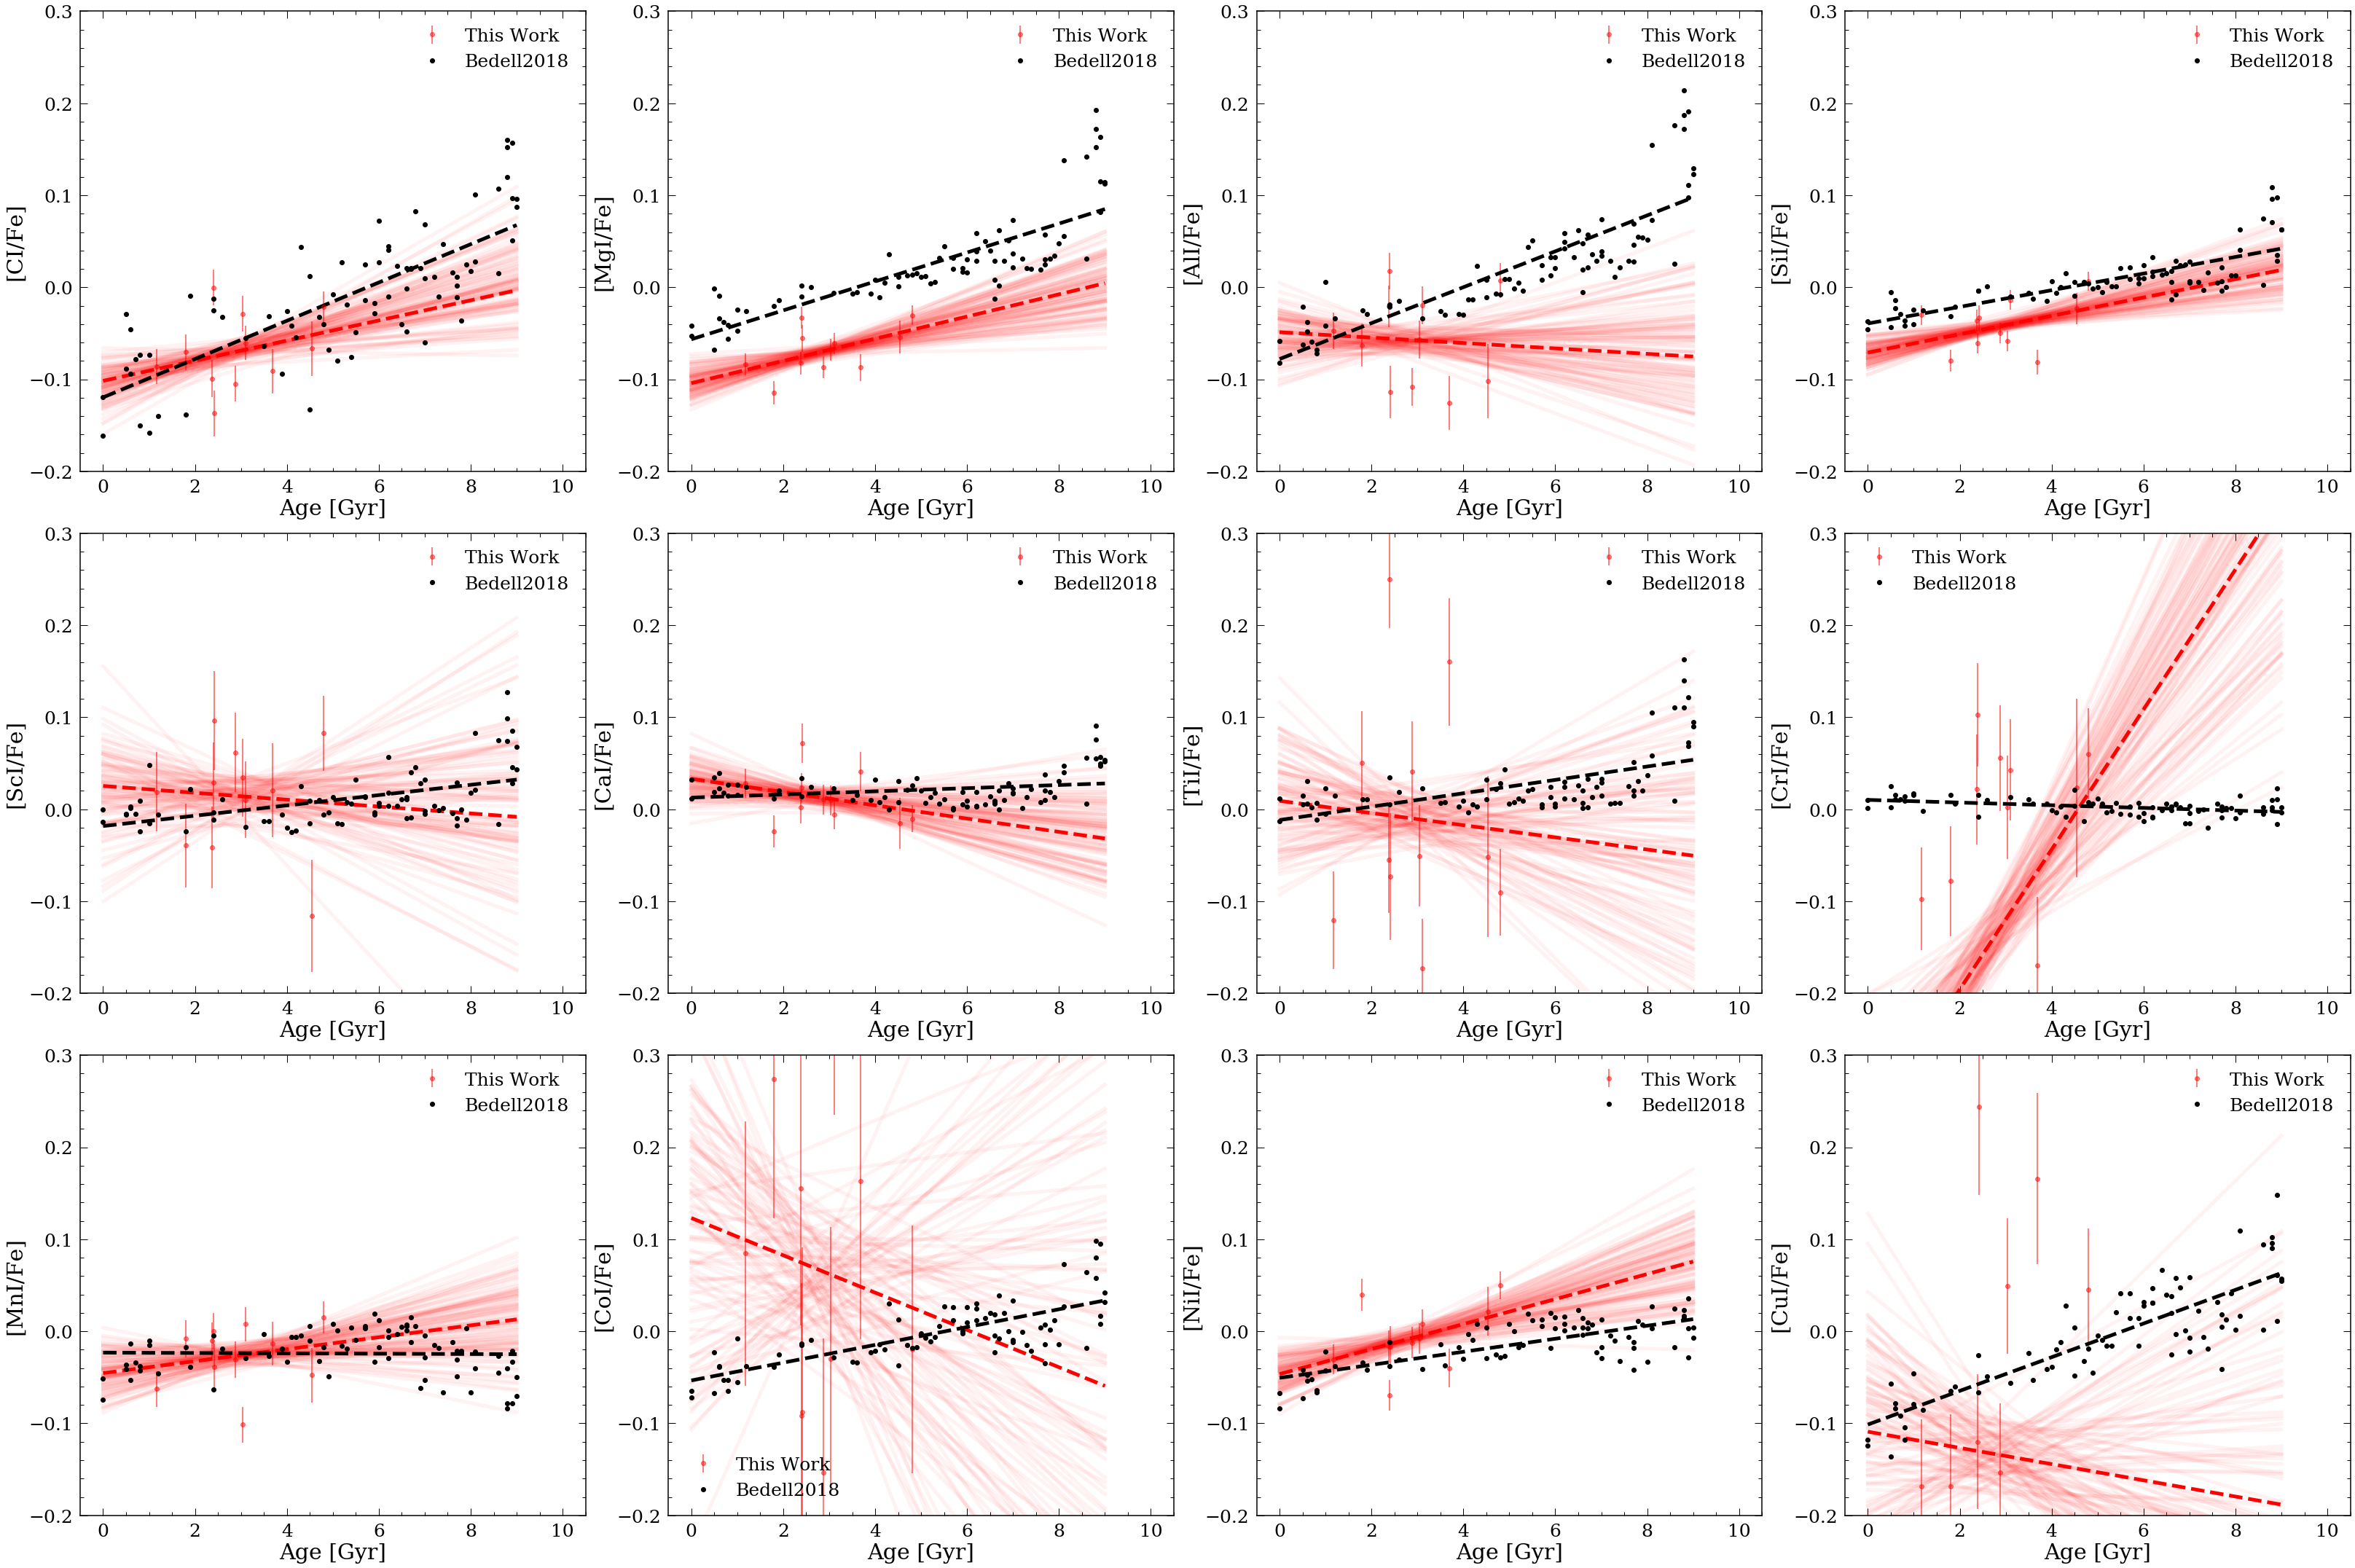

In [52]:
plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    update_progress(i/len(abun_apog))
    df_plot=df_st.loc[df_st[abun_apog[i]]>-100]
    df_plot=df_plot.reset_index(drop=True)
    plt.subplot(3,4,i+1)
    
    #err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)+np.power(df_plot["age_STD_err"],2.)
    err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)
    
    
    plt.errorbar(df_plot['kin_age'],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],
                 fmt='ro',label='This Work',alpha=0.5)
    """
    plt.errorbar(df_plot['age_MAD'],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],fmt='ro',label='This Work',alpha=0.5)
    """
    
    z = np.polyfit(df_plot['kin_age'],df_plot[abun_apog[i]],1)
    p = np.poly1d(z)
    plt.plot(range(10),p(range(10)),'r--',linewidth=5)
        
    for k in range(100):
        new_abun_mock=np.array([np.random.normal(df_plot.iloc[j][abun_apog[i]], 
                        df_plot.iloc[j][abun_apog[i]+"_ERR"]) for j in range(len(df_plot))])
        z = np.polyfit(df_plot['kin_age'],new_abun_mock,1)
        p = np.poly1d(z)
        plt.plot(range(10),p(range(10)),'r-',linewidth=5,alpha=0.05)
    
    z = np.polyfit(df_st_md['Agemp'], df_st_md[abund[abun_apog[i]]+'H]']-df_st_md['[Fe/H]'],1)
    p = np.poly1d(z)
    
    plt.errorbar(df_st_md['Agemp'],df_st_md[abund[abun_apog[i]]+'H]']-df_st_md['[Fe/H]'],
                 fmt='ko',label='Bedell2018')
    plt.plot(range(10),p(range(10)),'k--',linewidth=5)
    
    
    plt.ylim([-0.2,0.3])
    plt.xlim([-0.5,10.5])
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.legend()
plt.tight_layout()
#plt.savefig('Abundances.png')
    
    

# For Rvar

Text(0, 0.5, 'Rvar [ppm]')

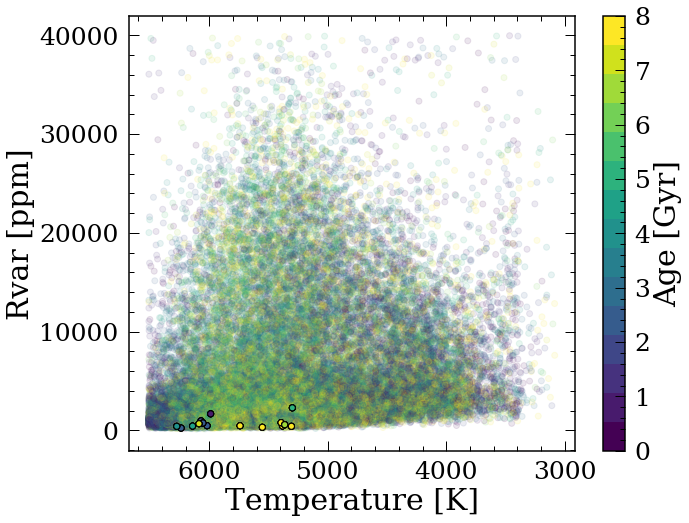

In [110]:
# AS stars

df_bin_MS=pd.read_pickle('minchisq_rvar.pkl')

ASstars=pd.read_table('/Users/lucy/Desktop/KeplerAges/ASage.webarchive',delimiter=',',skiprows=2)
ASstars=ASstars.dropna(subset=['KIC'])
ASstars

Clusters_cm=pd.merge(ASstars,df_bin_MS,left_on='KIC',right_on='KID',how='inner')
Clusters_cm


plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['Rvar'],
            c=df_bin_MS['kin_age'],cmap=cm,vmin=0,vmax=8,alpha=0.1)
plt.scatter(Clusters_cm['teff_calc'],Clusters_cm['Rvar'],
            c=Clusters_cm['Age'],cmap=cm,vmin=0,vmax=8,edgecolor='k')
cb=plt.colorbar()

cb.set_label('Age [Gyr]')
plt.gca().invert_xaxis()
plt.xlabel('Temperature [K]')
plt.ylabel('Rvar [ppm]')

5.156344842840613


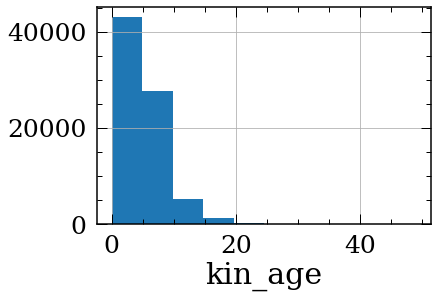

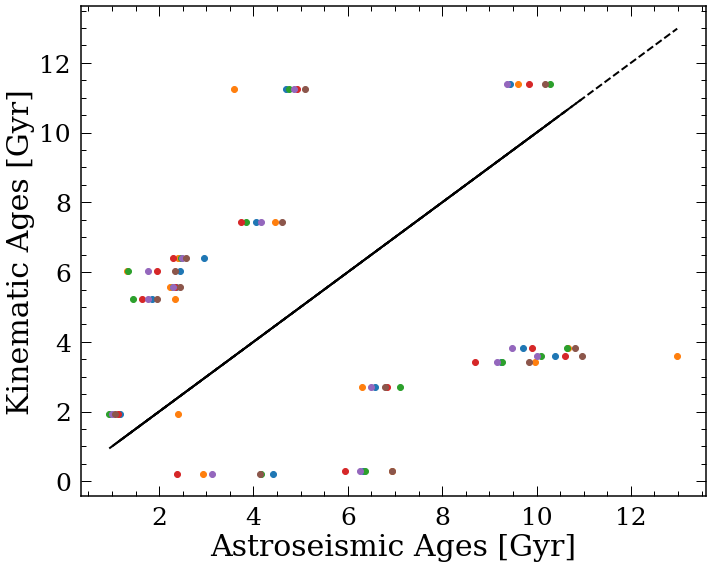

In [113]:
df_bin_MS['kin_age'].hist()
plt.xlabel('kin_age')
print(np.mean(df_bin_MS['kin_age']))


plt.figure(figsize=(10,8))
pcount=1
for pip in Clusters_cm['Pipe'].unique():
    plotCM=Clusters_cm.loc[Clusters_cm['Pipe']==pip]
    plt.plot([min(plotCM["Age"]),max(plotCM["Age"])],
             [min(plotCM["Age"]),max(plotCM["Age"])],'k--')
    

    plt.plot(plotCM["Age"],plotCM["kin_age"],'o',label=pip)
    
    plt.xlabel('Astroseismic Ages [Gyr]')
    plt.ylabel('Kinematic Ages [Gyr]')
    r = np.corrcoef(plotCM["Age"], plotCM["kin_age"])

    pcount=pcount+1
plt.tight_layout()
#plt.legend()

#plt.savefig('checkage.png')

In [ ]:
# Clusters

Clusters=pd.read_table('OpenClusters/JasonCluster2020April08.csv',delimiter=',')
#Clusters['AGE']=NGC6811['AGE']
Clusters.columns


dfProt_cluster=pd.merge(df_bin_MS[['teff_calc','Rvar','designation','kin_age','KID']],Clusters,left_on='designation',right_on='DR2NAME',how='inner')
print(len(dfProt_cluster))
clusternames=dfProt_cluster.CLUSTER.unique()
clusternames


def findstars(df,f1_star,f2_star,f1='teff_calc',f2='Prot'):
    KIDs=np.zeros(len(f1_star))
    count=0
    for i in range(len(f1_star)):
        update_progress(i/len(f1_star))
        teff,prot=f1_star[i],f2_star[i]
        df['dist']=np.power(df[f1]-teff,2.)+np.power(df[f2]-prot,2.)
        KIDs[count]=df.sort_values(by=['dist'])['KID'].iloc[0]
        count=count+1
    return KIDs



KIDs=findstars(df_bin_MS,Clusters['TEFF'],Clusters['PROT'])

In [ ]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['Rvar'],
            c=df_bin_MS['kin_age'],cmap=cm,vmin=0,vmax=7)
for name in Clusters.CLUSTER.unique():
    dfProt_cluster_single=Clusters.loc[Clusters['CLUSTER']==name].reset_index(drop=True)
    
    mask1=dfProt_cluster_single['PROT']<10
    mask2=dfProt_cluster_single['TEFF']<5000
    
    mask=mask1&mask2
    
    
    dfProt_cluster_single=dfProt_cluster_single[~mask]
    
    
    print(name,dfProt_cluster_single['AGE'].iloc[0]/1000)
    plt.scatter(dfProt_cluster_single['TEFF'],dfProt_cluster_single['PROT'],
                c=dfProt_cluster_single['AGE']/1000,cmap=cm,vmin=0,vmax=7,edgecolor='k')
    
cb=plt.colorbar()
plt.xlim([2500,7000])
plt.yscale('log')
cb.set_label('Age [Gyr]')
plt.gca().invert_xaxis()
plt.xlabel('Temperature [K]')
plt.ylabel('Prot [days]')

In [ ]:
Clusters['KID']=KIDs
df_CLUSTERS=pd.merge(Clusters,df_bin_MS[['KID','kin_age']],left_on='KID',right_on='KID',how='inner')

mask1=df_CLUSTERS['PROT']<10
mask2=df_CLUSTERS['TEFF']<5000
    
mask=mask1&mask2
    
    
df_CLUSTERS=df_CLUSTERS[~mask]

plt.figure(figsize=(10,8))
plt.scatter(df_CLUSTERS['kin_age'],df_CLUSTERS['AGE']/1000,c='r',cmap=cm)
plt.plot([0,5],[0,5],'r--')

#plt.ylim([0,50000])
plt.xlabel('Kinematic Age [Gyr]')
plt.ylabel('Cluster Age [Gyr]')
plt.xlim([0,5])
plt.ylim([0,5])

plt.figure(figsize=(10,8))
plt.scatter(dfProt_cluster['kin_age'],dfProt_cluster['AGE']/1000,c='r',cmap=cm)
plt.plot([0,5],[0,5],'r--')

#plt.ylim([0,50000])
plt.xlabel('Kinematic Age [Gyr]')
plt.ylabel('Cluster Age [Gyr]')
plt.xlim([0,5])
plt.ylim([0,5])

In [118]:
# plot against AGOGEE abundances

APOGEE=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')
df_rvar_s=pd.read_pickle('NewData/RvarVP_MS_150_w015_bin.pkl')
df_bin_MS=pd.merge(df_rvar_s[['KID','source_id']],df_bin_MS,left_on='KID',right_on='KID',how='inner')

cols=[i for i in APOGEE.columns if '_FE' in i]
cols=[i for i in cols if '_FEH' not in i]
cols=[i for i in cols if '_ERR' not in i]
cols=[i for i in cols if '_FLAG' not in i]
cols

df_bin_MS=pd.merge(APOGEE,df_bin_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_bin_MS=df_bin_MS.loc[df_bin_MS['FE_H']>-5000]

abund=['C_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','SC_FE','TI_FE',
      'V_FE','CR_FE','MN_FE','CO_FE','NI_FE','CU_FE','ZN_FE','SR_FE','Y_FE','ZR_FE',
      'BA_FE','LA_FE','CE_FE','PR_FE','ND_FE','SM_FE','EU_FE','GD_FE','DY_FE']

In [ ]:
#print(len(df_NN_MS),len(df_NN_giant),len(df_bin_MS),len(df_bin_giant))

# alpha/Fe
plt.plot(figsize=(10,8))
plt.plot(df_bin_MS['FE_H'],df_bin_MS['ALPHA_M'],'r.')
plt.ylabel('[$\\alpha$/FE]')
plt.xlabel('[FE/H]')
print(np.mean(df_bin_MS['FE_H']))

cm = plt.cm.get_cmap('viridis',5)
print(len(df_bin_MS))
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_bin_MS.loc[df_bin_MS[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['kin_age'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['kin_age'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['kin_age'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])

Progress: [##################--] 91.7%


<Figure size 2160x2160 with 0 Axes>

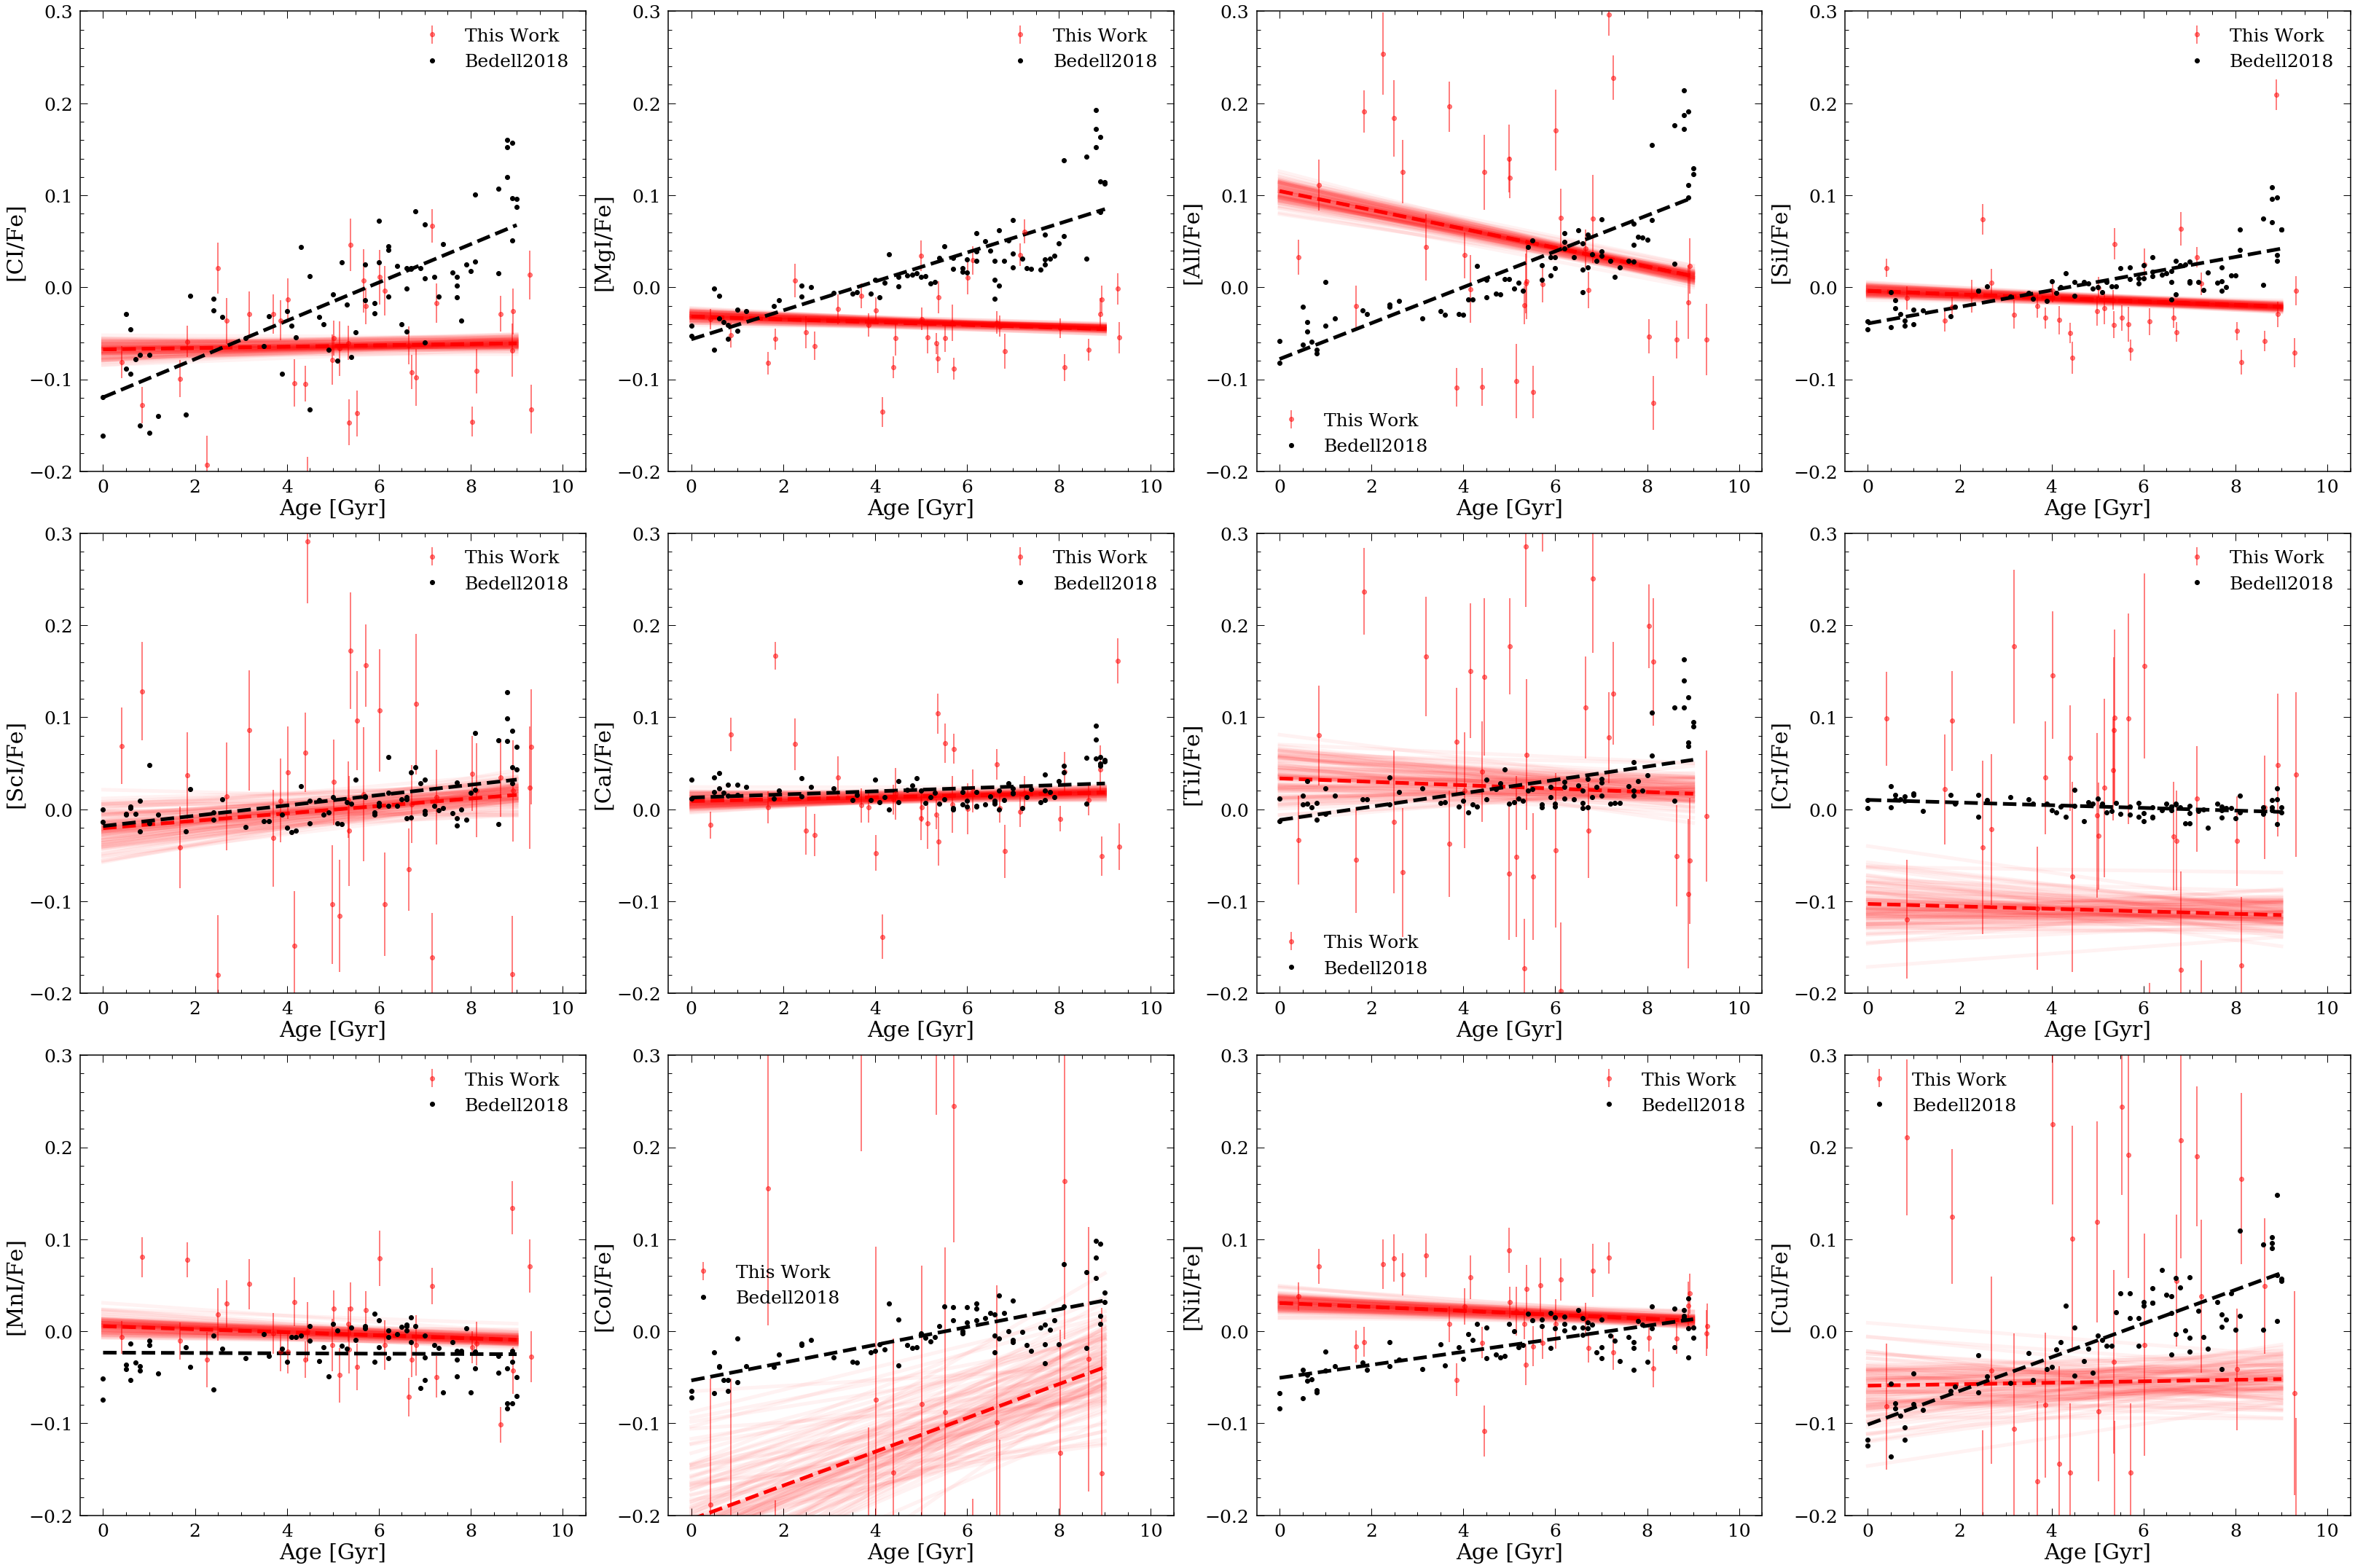

In [119]:
plt.figure(figsize=(30,30))
df_st=df_bin_MS.loc[abs(df_bin_MS['FE_H'])<=0.1]
# Solar twins

#df_st.to_pickle('Figures/solartwins.pkl')

#df_st=pd.read_pickle('Figures/solartwins.pkl')
df_st=df_st.loc[abs(df_st['teff_calc']-5778)<=100]
df_st=df_st.loc[abs(df_st['LOGG']-4.43)<=0.1]
print(len(df_st))
df_ka=pd.read_table('BedellAbund.csv',delimiter=',')
df_ka.HIP=[int(i) for i in df_ka.HIP.values]
df_ka_age=pd.read_table('Bedell_age.csv',delimiter=',')
df_ka_age.HIP=[int(i) for i in df_ka_age.HIP.values]
df_fe=pd.read_table('Bedell_Fe.csv',delimiter=',')
df_fe.HIP=[int(i) for i in df_fe.HIP.values]

df_st_md=pd.merge(df_ka,df_ka_age,left_on='HIP',right_on='HIP',how='inner')
df_st_md=pd.merge(df_st_md,df_fe,left_on='HIP',right_on='HIP',how='inner')
df_st_md.columns

abun_apog=['C_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','TI_FE','CR_FE','MN_FE','CO_FE',
       'NI_FE','CU_FE']

abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/'}

plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    update_progress(i/len(abun_apog))
    df_plot=df_st.loc[df_st[abun_apog[i]]>-100]
    df_plot=df_plot.reset_index(drop=True)
    plt.subplot(3,4,i+1)
    
    #err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)+np.power(df_plot["age_STD_err"],2.)
    err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)
    
    
    plt.errorbar(df_plot['kin_age'],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],
                 fmt='ro',label='This Work',alpha=0.5)
    """
    plt.errorbar(df_plot['age_MAD'],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],fmt='ro',label='This Work',alpha=0.5)
    """
    
    z = np.polyfit(df_plot['kin_age'],df_plot[abun_apog[i]],1)
    p = np.poly1d(z)
    plt.plot(range(10),p(range(10)),'r--',linewidth=5)
        
    for k in range(100):
        new_abun_mock=np.array([np.random.normal(df_plot.iloc[j][abun_apog[i]], 
                        df_plot.iloc[j][abun_apog[i]+"_ERR"]) for j in range(len(df_plot))])
        z = np.polyfit(df_plot['kin_age'],new_abun_mock,1)
        p = np.poly1d(z)
        plt.plot(range(10),p(range(10)),'r-',linewidth=5,alpha=0.05)
    
    z = np.polyfit(df_st_md['Agemp'], df_st_md[abund[abun_apog[i]]+'H]']-df_st_md['[Fe/H]'],1)
    p = np.poly1d(z)
    
    plt.errorbar(df_st_md['Agemp'],df_st_md[abund[abun_apog[i]]+'H]']-df_st_md['[Fe/H]'],
                 fmt='ko',label='Bedell2018')
    plt.plot(range(10),p(range(10)),'k--',linewidth=5)
    
    
    plt.ylim([-0.2,0.3])
    plt.xlim([-0.5,10.5])
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.legend()
plt.tight_layout()
#plt.savefig('Abundances.png')
    
    